<a href="https://colab.research.google.com/github/gabrielagonzalezliliana/Analisis_de-_sentimientos_McDonalds_NLP-_Red-Neuronal/blob/main/Copia_de_McDonalds_analisis_de_rese%C3%B1as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üéØ Objetivo del proyecto
Aplicar t√©cnicas de procesamiento de lenguaje natural (NLP) y algoritmos de machine learning para analizar el sentimiento de rese√±as de clientes de McDonald‚Äôs,los comentarios como positivos o negativos, identificar patrones frecuentes en el lenguaje utilizado por los usuarios y evaluar el tono emocional a trav√©s de m√©tricas de polaridad y subjetividad.


En el contexto actual, donde la opini√≥n de los usuarios impacta fuertemente en la imagen p√∫blica de las marcas, analizar el contenido de las rese√±as se vuelve una tarea clave para la toma de decisiones estrat√©gicas. Este proyecto se basa en un conjunto de rese√±as de clientes de McDonald's, con el prop√≥sito de aplicar t√©cnicas de procesamiento de lenguaje natural para entender c√≥mo se expresa el sentimiento del consumidor. A trav√©s de limpieza y transformaci√≥n del texto, seguido por la aplicaci√≥n de algoritmos y an√°lisis, se busca obtener insights valiosos sobre la percepci√≥n general del servicio y la experiencia del cliente.



#CARGA Y EXPLORACION DEL DATASET

Importacion de librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Carga del Dataset

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/gabrielagonzalezliliana/Analisis_de-_sentimientos_McDonalds_NLP-_Red-Neuronal/main/McDonald_s_Reviews.csv",encoding='latin1')

df

reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
4      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
...                                                  ...        ...   
33391  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33392  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33393  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33394  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33395  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   

       longitude rating_count   review_time  \
0     -97.792874        1,240  3 months ago   
1     -97.792874        1,240    5 days ago   
2     -97.792874        1,240    5 days ago   
3     -97.792874        1,240   a month ago   
4     -97.792874        1,240  2 months ago   
...          ...          ...           ...   
33391 -80.189098        2,810   4 years ago   
33392 -80.189098        2,810    a year ago   
33393 -80.189098        2,810    a year ago   
33394 -80.189098        2,810   5 years ago   
33395 -80.189098        2,810   2 years ago   

                                                  review   rating  
0      Why does it look like someone spit on my food?...   1 star  
1      It'd McDonalds. It is what it is as far as the...  4 stars  
2      Made a mobile order got to the speaker and che...   1 star  
3      My mc. Crispy chicken sandwich was √Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø...  5 stars  
4      I repeat my order 3 times in the drive thru, a...   1 star  
...                                                  ...      ...  
33391                        They treated me very badly.   1 star  
33392                           The service is very good  5 stars  
33393                         To remove hunger is enough  4 stars  
33394  It's good, but lately it has become very expen...  5 stars  
33395                          they took good care of me  5 stars  

[33396 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


Distribucion de Puntuaciones(Starts)

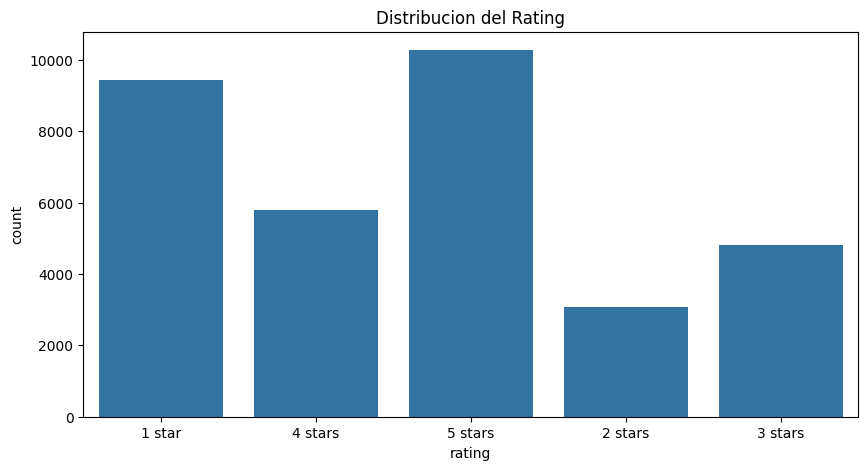

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df)
plt.title('Distribucion del Rating')
plt.show()

El an√°lisis inicial de la distribuci√≥n de calificaciones revela que la mayor√≠a de las rese√±as se concentran en 5 estrellas, representando la mayor proporci√≥n del dataset. Le siguen en frecuencia las rese√±as de 1 estrella, mientras que las calificaciones de 4, 3 y 2 estrellas aparecen en menor medida. Esta polarizaci√≥n sugiere una experiencia dividida entre clientes muy satisfechos y clientes insatisfechos.

creacion del df reviews

In [ ]:
reviews = df[['review','rating']].copy()
reviews

review   rating
0      Why does it look like someone spit on my food?...   1 star
1      It'd McDonalds. It is what it is as far as the...  4 stars
2      Made a mobile order got to the speaker and che...   1 star
3      My mc. Crispy chicken sandwich was √Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø...  5 stars
4      I repeat my order 3 times in the drive thru, a...   1 star
...                                                  ...      ...
33391                        They treated me very badly.   1 star
33392                           The service is very good  5 stars
33393                         To remove hunger is enough  4 stars
33394  It's good, but lately it has become very expen...  5 stars
33395                          they took good care of me  5 stars

[33396 rows x 2 columns]

#LIMPIEZA DE TEXTO

evaluo valores nulos

In [ ]:
reviews.isnull().sum()

review    0
rating    0
dtype: int64

Limpieza de texto

In [ ]:
import re
import string

In [ ]:
def limpieza(texto):
    # Convertir a min√∫sculas
    texto = str(texto).lower()

    # Eliminar textos entre corchetes (ej.: etiquetas)
    texto = re.sub(r'\[.*?\]', '', texto)

    # Eliminar URLs
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)

    # Eliminar etiquetas HTML
    texto = re.sub(r'<.*?>+', '', texto)

    # Eliminar signos de puntuaci√≥n
    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto)

    # Eliminar saltos de l√≠nea
    texto = re.sub(r'\n', ' ', texto)

    # Eliminar palabras que contienen n√∫meros
    texto = re.sub(r'\w*\d\w*', '', texto)

    # Eliminar emojis y caracteres especiales (no ASCII)
    texto = re.sub(r'[^\x00-\x7F]+', '', texto)

    # Eliminar espacios extras al inicio y final
    texto = texto.strip()

    return texto

Limpio el texto eliminando:

- May√∫sculas (conversi√≥n a min√∫sculas)
- URLs
- HTML
- Puntuaci√≥n
- Emojis
- N√∫meros
- Espacios innecesarios

Aplico la funcion de limpieza a la columna review y agrego columna limpieza_review

In [ ]:
reviews['limpieza_review'] = reviews['review'].apply(limpieza)
reviews

review   rating  \
0      Why does it look like someone spit on my food?...   1 star   
1      It'd McDonalds. It is what it is as far as the...  4 stars   
2      Made a mobile order got to the speaker and che...   1 star   
3      My mc. Crispy chicken sandwich was √Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø...  5 stars   
4      I repeat my order 3 times in the drive thru, a...   1 star   
...                                                  ...      ...   
33391                        They treated me very badly.   1 star   
33392                           The service is very good  5 stars   
33393                         To remove hunger is enough  4 stars   
33394  It's good, but lately it has become very expen...  5 stars   
33395                          they took good care of me  5 stars   

                                         limpieza_review  
0      why does it look like someone spit on my food ...  
1      itd mcdonalds it is what it is as far as the f...  
2      made a mobile order got to the speaker and che...  
3      my mc crispy chicken sandwich was  customer se...  
4      i repeat my order  times in the drive thru and...  
...                                                  ...  
33391                         they treated me very badly  
33392                           the service is very good  
33393                         to remove hunger is enough  
33394   its good but lately it has become very expensive  
33395                          they took good care of me  

[33396 rows x 3 columns]

observo una review en particular si la limpieza se realizo correctamente

In [ ]:
print(reviews['limpieza_review'][3])

my mc crispy chicken sandwich was  customer service was quick and p


#Tokenizacion- Oraciones- stopwords -Stemming - Lematizacion

In [ ]:
!python3 -m spacy download en_core_web_sm


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 46.9 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
# Cargo modelo en ingl√©s
nlp_en = spacy.load("en_core_web_sm")

# Funci√≥n para obtener tokens y oraciones
def procesar_texto(texto):
    if pd.isna(texto):
        return [], []
    doc = nlp_en(texto)
    tokens = [token.text for token in doc]
    oraciones = [sent.text for sent in doc.sents]
    return tokens, oraciones

# Aplico la funci√≥n a cada fila y guardo resultados en df reviews
reviews[['tokens_spacy', 'oraciones_spacy']] = reviews['limpieza_review'].apply(
    lambda x: pd.Series(procesar_texto(x))
)

# Ver
print(reviews[['limpieza_review', 'tokens_spacy', 'oraciones_spacy']].head())


                                     limpieza_review  \
0  why does it look like someone spit on my food ...   
1  itd mcdonalds it is what it is as far as the f...   
2  made a mobile order got to the speaker and che...   
3  my mc crispy chicken sandwich was  customer se...   
4  i repeat my order  times in the drive thru and...   

                                        tokens_spacy  \
0  [why, does, it, look, like, someone, spit, on,...   
1  [it, d, mcdonalds, it, is, what, it, is, as, f...   
2  [made, a, mobile, order, got, to, the, speaker...   
3  [my, mc, crispy, chicken, sandwich, was,  , cu...   
4  [i, repeat, my, order,  , times, in, the, driv...   

                                     oraciones_spacy  
0  [why does it look like someone spit on my food...  
1  [itd mcdonalds it is what it is as far as the ...  
2  [made a mobile order got to the speaker and ch...  
3  [my mc crispy chicken sandwich was  customer s...  
4  [i repeat my order  times in the drive thru an..

In [ ]:
reviews

review   rating  \
0      Why does it look like someone spit on my food?...   1 star   
1      It'd McDonalds. It is what it is as far as the...  4 stars   
2      Made a mobile order got to the speaker and che...   1 star   
3      My mc. Crispy chicken sandwich was √Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø...  5 stars   
4      I repeat my order 3 times in the drive thru, a...   1 star   
...                                                  ...      ...   
33391                        They treated me very badly.   1 star   
33392                           The service is very good  5 stars   
33393                         To remove hunger is enough  4 stars   
33394  It's good, but lately it has become very expen...  5 stars   
33395                          they took good care of me  5 stars   

                                         limpieza_review  \
0      why does it look like someone spit on my food ...   
1      itd mcdonalds it is what it is as far as the f...   
2      made a mobile order got to the speaker and che...   
3      my mc crispy chicken sandwich was  customer se...   
4      i repeat my order  times in the drive thru and...   
...                                                  ...   
33391                         they treated me very badly   
33392                           the service is very good   
33393                         to remove hunger is enough   
33394   its good but lately it has become very expensive   
33395                          they took good care of me   

                                            tokens_spacy  \
0      [why, does, it, look, like, someone, spit, on,...   
1      [it, d, mcdonalds, it, is, what, it, is, as, f...   
2      [made, a, mobile, order, got, to, the, speaker...   
3      [my, mc, crispy, chicken, sandwich, was,  , cu...   
4      [i, repeat, my, order,  , times, in, the, driv...   
...                                                  ...   
33391                   [they, treated, me, very, badly]   
33392                     [the, service, is, very, good]   
33393                   [to, remove, hunger, is, enough]   
33394  [its, good, but, lately, it, has, become, very...   
33395                   [they, took, good, care, of, me]   

                                         oraciones_spacy  
0      [why does it look like someone spit on my food...  
1      [itd mcdonalds it is what it is as far as the ...  
2      [made a mobile order got to the speaker and ch...  
3      [my mc crispy chicken sandwich was  customer s...  
4      [i repeat my order  times in the drive thru an...  
...                                                  ...  
33391                       [they treated me very badly]  
33392                         [the service is very good]  
33393                       [to remove hunger is enough]  
33394  [its good, but lately it has become very expen...  
33395                        [they took good care of me]  

[33396 rows x 5 columns]

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


# Descargo recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Cargo modelo spaCy en ingl√©s
nlp_en = spacy.load("en_core_web_sm")

# Stopwords y stemmer en ingl√©s
stopwords_en = set(stopwords.words("english"))
stemmer_en = SnowballStemmer("english")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def procesar_review(texto):
    if pd.isna(texto):
        return [], [], []  # Por si hay valores nulos

    # Tokenizaci√≥n con nltk
    tokens = word_tokenize(texto.lower(), language="english")

    # Eliminar stopwords
    tokens_sin_stop = [word for word in tokens if word.isalpha() and word not in stopwords_en]

    # Stemming
    stemmed_tokens = [stemmer_en.stem(token) for token in tokens_sin_stop]

    # Lematizaci√≥n con spaCy
    doc = nlp_en(" ".join(tokens_sin_stop))
    lemmatized_tokens = [token.lemma_ for token in doc if token.is_alpha]

    return tokens_sin_stop, stemmed_tokens, lemmatized_tokens


In [ ]:
# Aplicar la funci√≥n a cada fila
reviews[["tokens_sin_stopwords", "tokens_stemmed", "tokens_lemmatized"]] = reviews["limpieza_review"].apply(
    lambda x: pd.Series(procesar_review(x))
)

In [ ]:
reviews

review   rating  \
0      Why does it look like someone spit on my food?...   1 star   
1      It'd McDonalds. It is what it is as far as the...  4 stars   
2      Made a mobile order got to the speaker and che...   1 star   
3      My mc. Crispy chicken sandwich was √Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø...  5 stars   
4      I repeat my order 3 times in the drive thru, a...   1 star   
...                                                  ...      ...   
33391                        They treated me very badly.   1 star   
33392                           The service is very good  5 stars   
33393                         To remove hunger is enough  4 stars   
33394  It's good, but lately it has become very expen...  5 stars   
33395                          they took good care of me  5 stars   

                                         limpieza_review  \
0      why does it look like someone spit on my food ...   
1      itd mcdonalds it is what it is as far as the f...   
2      made a mobile order got to the speaker and che...   
3      my mc crispy chicken sandwich was  customer se...   
4      i repeat my order  times in the drive thru and...   
...                                                  ...   
33391                         they treated me very badly   
33392                           the service is very good   
33393                         to remove hunger is enough   
33394   its good but lately it has become very expensive   
33395                          they took good care of me   

                                            tokens_spacy  \
0      [why, does, it, look, like, someone, spit, on,...   
1      [it, d, mcdonalds, it, is, what, it, is, as, f...   
2      [made, a, mobile, order, got, to, the, speaker...   
3      [my, mc, crispy, chicken, sandwich, was,  , cu...   
4      [i, repeat, my, order,  , times, in, the, driv...   
...                                                  ...   
33391                   [they, treated, me, very, badly]   
33392                     [the, service, is, very, good]   
33393                   [to, remove, hunger, is, enough]   
33394  [its, good, but, lately, it, has, become, very...   
33395                   [they, took, good, care, of, me]   

                                         oraciones_spacy  \
0      [why does it look like someone spit on my food...   
1      [itd mcdonalds it is what it is as far as the ...   
2      [made a mobile order got to the speaker and ch...   
3      [my mc crispy chicken sandwich was  customer s...   
4      [i repeat my order  times in the drive thru an...   
...                                                  ...   
33391                       [they treated me very badly]   
33392                         [the service is very good]   
33393                       [to remove hunger is enough]   
33394  [its good, but lately it has become very expen...   
33395                        [they took good care of me]   

                                    tokens_sin_stopwords  \
0      [look, like, someone, spit, food, normal, tran...   
1      [itd, mcdonalds, far, food, atmosphere, go, st...   
2      [made, mobile, order, got, speaker, checked, l...   
3      [mc, crispy, chicken, sandwich, customer, serv...   
4      [repeat, order, times, drive, thru, still, man...   
...                                                  ...   
33391                                   [treated, badly]   
33392                                    [service, good]   
33393                           [remove, hunger, enough]   
33394                  [good, lately, become, expensive]   
33395                                 [took, good, care]   

                                          tokens_stemmed  \
0      [look, like, someon, spit, food, normal, trans...   
1      [itd, mcdonald, far, food, atmospher, go, staf...   
2      [made, mobil, order, got, speaker, check, line...   
3      [mc, crispi, chicken, sandwich, custom, servic...   
4      [repeat, order, tim

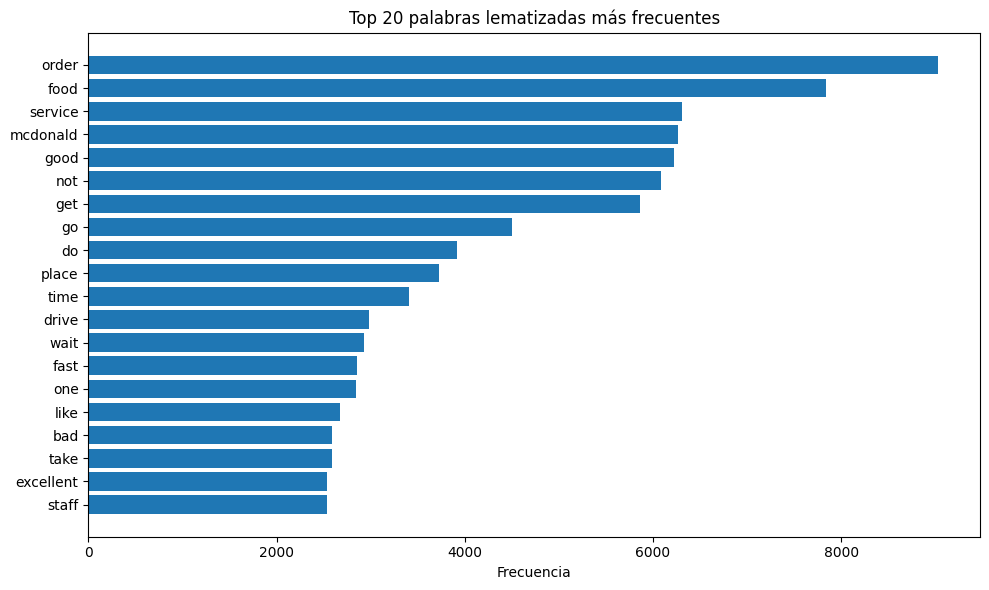

In [ ]:
from collections import Counter

# Combinar todos los tokens lematizados en una lista
all_lemmas = [lemma for lista in reviews["tokens_lemmatized"] for lemma in lista]

# Contar frecuencia
freq_lemmas = Counter(all_lemmas).most_common(20)

# Visualizar
lemmas, counts = zip(*freq_lemmas)
plt.figure(figsize=(10, 6))
plt.barh(lemmas[::-1], counts[::-1])
plt.title("Top 20 palabras lematizadas m√°s frecuentes")
plt.xlabel("Frecuencia")
plt.tight_layout()
plt.show()


In [ ]:
# Crear DataFrame con los resultados
df_freq = pd.DataFrame(freq_lemmas, columns=["Lema", "Frecuencia"])

# Mostrar la tabla
print(df_freq)

         Lema  Frecuencia
0       order        9024
1        food        7843
2     service        6311
3    mcdonald        6270
4        good        6222
5         not        6081
6         get        5858
7          go        4499
8          do        3913
9       place        3728
10       time        3408
11      drive        2985
12       wait        2929
13       fast        2860
14        one        2843
15       like        2676
16        bad        2591
17       take        2591
18  excellent        2536
19      staff        2533


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Unimos todos los tokens lematizados en una sola cadena de texto
texto_lemmatizado = " ".join([" ".join(tokens) for tokens in reviews["tokens_lemmatized"]])


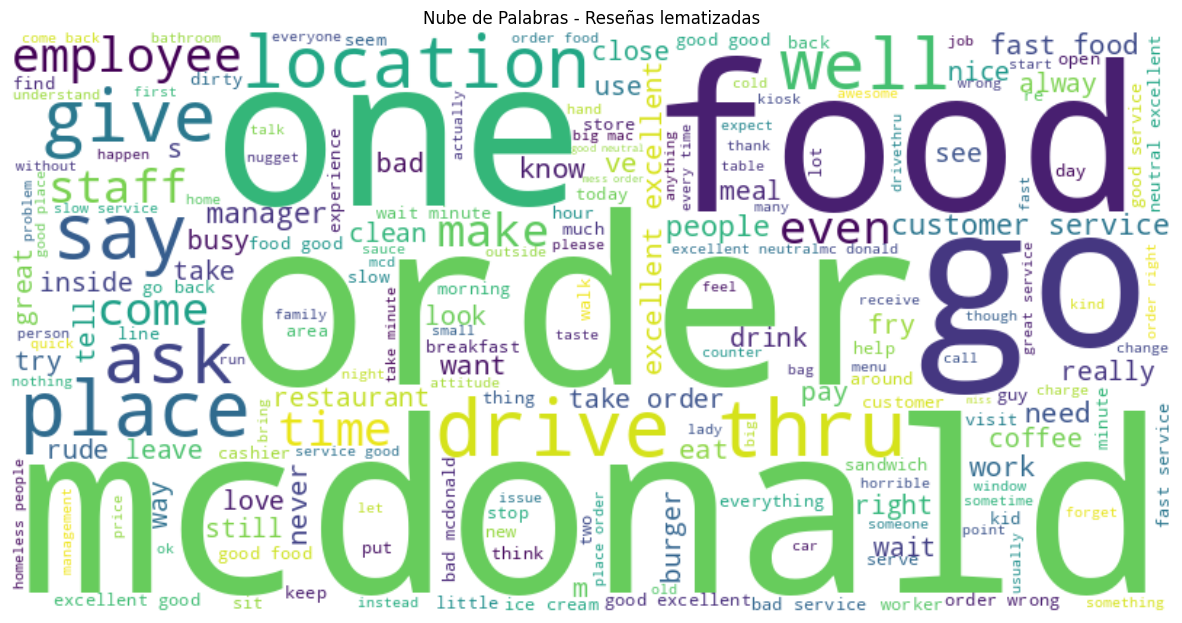

In [ ]:
# Crear la nube de palabras
wordcloud = WordCloud(
    stopwords=STOPWORDS,  # Las stopwords ya fueron eliminadas, pero por seguridad
    background_color="white",
    width=800,
    height=400,
    colormap='viridis'  # Pod√©s cambiar el esquema de color
).generate(texto_lemmatizado)

# Visualizar la nube
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Rese√±as lematizadas")
plt.show()


Las palabras m√°s recurrentes en las rese√±as reflejan aspectos clave de la experiencia del cliente. Entre los t√©rminos con mayor frecuencia se destacan order, food, service, mcdonald, y good, lo que indica que los usuarios enfocan sus opiniones principalmente en la calidad del pedido, la comida y el servicio. Adem√°s, t√©rminos como not, bad y wait sugieren cr√≠ticas relacionadas con problemas o insatisfacciones puntuales.

In [ ]:
from collections import Counter

# Contar todas las palabras en el texto
lemmas_flat = texto_lemmatizado.split()
conteo = Counter(lemmas_flat)

# Filtrar las que contengan "excellent"
for palabra in conteo:
    if "excellent" in palabra:
        print(f"'{palabra}' aparece {conteo[palabra]} veces")


'excellent' aparece 2536 veces
'excellentplace' aparece 1 veces


NOTA: La palabra "excellent" se visualiza m√°s de una vez en la nube debido a su alta frecuencia (2536 veces). Esto es un comportamiento de WordCloud para balancear el dise√±o, no un error en el preprocesamiento.

In [ ]:
# Unir los tokens lematizados en un solo string por fila
reviews["lemmatized_text"] = reviews["tokens_lemmatized"].apply(lambda x: " ".join(x))


In [ ]:
# Verificar valores nulos
reviews["lemmatized_text"].isnull().sum()

np.int64(0)

#BAG OF WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear corpus
corpus = reviews["lemmatized_text"].tolist()

# Crear y ajustar vectorizador BoW
cv = CountVectorizer()
bow_matrix = cv.fit_transform(corpus)

# Mostrar detalles
print("Dimensiones de la matriz Bag-of-Words:", bow_matrix.shape)
print("Primeras palabras del vocabulario BoW:", cv.get_feature_names_out()[:10])


Dimensiones de la matriz Bag-of-Words: (33396, 12639)
Primeras palabras del vocabulario BoW: ['aa' 'aaa' 'aaaah' 'aaand' 'aak' 'aarp' 'aau' 'ab' 'abandon' 'abc']


#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear y ajustar vectorizador TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)

# Mostrar detalles
print("Dimensiones de la matriz TF-IDF:", tfidf_matrix.shape)
print("Primeras palabras del vocabulario TF-IDF:", tfidf.get_feature_names_out()[:10])


Dimensiones de la matriz TF-IDF: (33396, 12639)
Primeras palabras del vocabulario TF-IDF: ['aa' 'aaa' 'aaaah' 'aaand' 'aak' 'aarp' 'aau' 'ab' 'abandon' 'abc']


In [ ]:
corpus

['look like someone spit food normal transaction everyone chill polite do not want eat I m try think milky whiteclear substance food sure come back',
 'it d mcdonald far food atmosphere go staff make difference friendly accommodate always smile make pleasant experience many fast food place',
 'make mobile order get speaker check line move leave otherwise I d late work never get refund app call say could get money back person stuck system go person next day manager tell',
 'mc crispy chicken sandwich customer service quick p',
 'repeat order time drive thru still manage mess suppose large meal double filet fish large fry cheese wrong either need pay close attention order make understand english need work drive thru',
 'work door dash lock we wait long line reason try beg open I m door dash refuse covid get new job',
 'could give location zero customer service would pull drive place simple order order regular hamburg cookie pay pull window pick tell pull space sit sit minute later order 

#EXTRACCION DE TERMINOS CLAVE Y MODELADO DE TEMAS

Aplicar LDA sobre la matriz Bag-of-Words para extraer 5 temas

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Crear modelo LDA con 5 temas
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(bow_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n Tema {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


In [ ]:
# Mostrar los 10 t√©rminos m√°s representativos de cada uno de los 5 temas
display_topics(lda, cv.get_feature_names_out(), 10)



 Tema 1:
good food service fast always great get hot quick order

 Tema 2:
excellent service customer people order homeless use not slow kiosk

 Tema 3:
mcdonald food fry not like go get eat burger do

 Tema 4:
place clean service nice staff bad great people terrible friendly

 Tema 5:
order not get go do drive wait time ask say


#POLARIDAD-SUBJETIVIDAD

In [ ]:
!pip install textblob


In [ ]:
from textblob import TextBlob

# Funci√≥n para obtener polaridad y subjetividad
def get_polarity_subjectivity(text):
    if pd.isna(text) or not text.strip():
        return pd.Series([0, 0])  # Valores neutros por defecto
    blob = TextBlob(text)
    return pd.Series([blob.polarity, blob.subjectivity])


In [ ]:
reviews[["polarity", "subjectivity"]] = reviews["lemmatized_text"].apply(get_polarity_subjectivity)


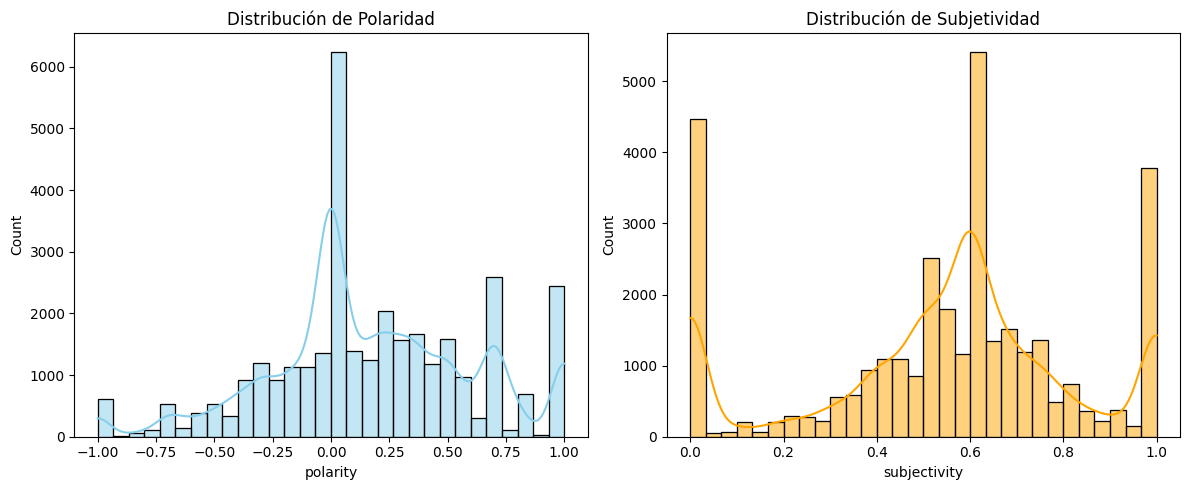

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(reviews["polarity"], bins=30, kde=True, color='skyblue')
plt.title("Distribuci√≥n de Polaridad")

plt.subplot(1,2,2)
sns.histplot(reviews["subjectivity"], bins=30, kde=True, color='orange')
plt.title("Distribuci√≥n de Subjetividad")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Definir bins para polaridad (ejemplo: negativo, neutral, positivo)
reviews['polarity_cat'] = pd.cut(reviews['polarity'], bins=[-1, -0.1, 0.1, 1], labels=['Negativo', 'Neutral', 'Positivo'])

# Definir bins para subjetividad (ejemplo: baja, media, alta)
reviews['subjectivity_cat'] = pd.cut(reviews['subjectivity'], bins=[0, 0.33, 0.66, 1], labels=['Baja', 'Media', 'Alta'])

# Ver las primeras filas para chequear
print(reviews[['polarity', 'polarity_cat', 'subjectivity', 'subjectivity_cat']].head())


   polarity polarity_cat  subjectivity subjectivity_cat
0  0.216667     Positivo      0.512963            Media
1  0.368056     Positivo      0.611111            Media
2 -0.100000      Neutral      0.200000             Baja
3 -0.133333     Negativo      0.725000             Alta
4 -0.041071      Neutral      0.322024             Baja


El an√°lisis de polaridad indica que un gran n√∫mero de rese√±as tiene un tono positivo, con valores de polaridad superiores a cero, aunque tambi√©n se identifican rese√±as con polaridad neutral y negativa. La subjetividad var√≠a, con muchas opiniones mostrando un nivel medio de subjetividad, lo que refleja la mezcla de hechos y percepciones personales expresadas por los usuarios. Esta diversidad confirma que las opiniones abarcan desde experiencias objetivas hasta valoraciones emocionales fuertes.

#CLASIFICACION TRADICIONAL PARA ANALISIS DE SENTIMIENTOS

In [ ]:
reviews

review   rating  \
0      Why does it look like someone spit on my food?...   1 star   
1      It'd McDonalds. It is what it is as far as the...  4 stars   
2      Made a mobile order got to the speaker and che...   1 star   
3      My mc. Crispy chicken sandwich was √Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø¬Ω√Ø¬ø...  5 stars   
4      I repeat my order 3 times in the drive thru, a...   1 star   
...                                                  ...      ...   
33391                        They treated me very badly.   1 star   
33392                           The service is very good  5 stars   
33393                         To remove hunger is enough  4 stars   
33394  It's good, but lately it has become very expen...  5 stars   
33395                          they took good care of me  5 stars   

                                         limpieza_review  \
0      why does it look like someone spit on my food ...   
1      itd mcdonalds it is what it is as far as the f...   
2      made a mobile order got to the speaker and che...   
3      my mc crispy chicken sandwich was  customer se...   
4      i repeat my order  times in the drive thru and...   
...                                                  ...   
33391                         they treated me very badly   
33392                           the service is very good   
33393                         to remove hunger is enough   
33394   its good but lately it has become very expensive   
33395                          they took good care of me   

                                            tokens_spacy  \
0      [why, does, it, look, like, someone, spit, on,...   
1      [it, d, mcdonalds, it, is, what, it, is, as, f...   
2      [made, a, mobile, order, got, to, the, speaker...   
3      [my, mc, crispy, chicken, sandwich, was,  , cu...   
4      [i, repeat, my, order,  , times, in, the, driv...   
...                                                  ...   
33391                   [they, treated, me, very, badly]   
33392                     [the, service, is, very, good]   
33393                   [to, remove, hunger, is, enough]   
33394  [its, good, but, lately, it, has, become, very...   
33395                   [they, took, good, care, of, me]   

                                         oraciones_spacy  \
0      [why does it look like someone spit on my food...   
1      [itd mcdonalds it is what it is as far as the ...   
2      [made a mobile order got to the speaker and ch...   
3      [my mc crispy chicken sandwich was  customer s...   
4      [i repeat my order  times in the drive thru an...   
...                                                  ...   
33391                       [they treated me very badly]   
33392                         [the service is very good]   
33393                       [to remove hunger is enough]   
33394  [its good, but lately it has become very expen...   
33395                        [they took good care of me]   

                                    tokens_sin_stopwords  \
0      [look, like, someone, spit, food, normal, tran...   
1      [itd, mcdonalds, far, food, atmosphere, go, st...   
2      [made, mobile, order, got, speaker, checked, l...   
3      [mc, crispy, chicken, sandwich, customer, serv...   
4      [repeat, order, times, drive, thru, still, man...   
...                                                  ...   
33391                                   [treated, badly]   
33392                                    [service, good]   
33393                           [remove, hunger, enough]   
33394                  [good, lately, become, expensive]   
33395                                 [took, good, care]   

                                          tokens_stemmed  \
0      [look, like, someon, spit, food, normal, trans...   
1      [itd, mcdonald, far, food, atmospher, go, staf...   
2      [made, mobil, order, got, speaker, check, line...   
3      [mc, crispi, chicken, sandwich, custom, servic...   
4      [repeat, order, tim

In [ ]:
# Extraer el n√∫mero antes de la palabra 'star' o 'stars'
reviews["rating_clean"] = reviews["rating"].str.extract(r"(\d+)")

# Convertir a entero
reviews["rating_clean"] = pd.to_numeric(reviews["rating_clean"])

# Crear la variable binaria de sentimiento
reviews["sentiment_bin"] = reviews["rating_clean"].apply(lambda x: 1 if x > 3 else 0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Variables para el modelo
X = tfidf_matrix  # ya lo ten√©s generado previamente
y = reviews["sentiment_bin"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))


Accuracy: 0.8523952095808384
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      3482
           1       0.88      0.80      0.84      3198

    accuracy                           0.85      6680
   macro avg       0.86      0.85      0.85      6680
weighted avg       0.85      0.85      0.85      6680



El modelo Naive Bayes alcanz√≥ una precisi√≥n (accuracy) del 85.2%, demostrando una buena capacidad para clasificar correctamente las rese√±as en positivas y negativas. Los valores de precisi√≥n y recall para ambas clases sugieren un equilibrio s√≥lido, con un desempe√±o robusto para identificar opiniones tanto positivas como negativas.

In [ ]:
import joblib

joblib.dump(nb_classifier, "/content/nb_mcdonalds_model.pkl")
joblib.dump(tfidf, "/content/tfidf_vectorizer.pkl")


['/content/tfidf_vectorizer.pkl']

In [ ]:
import re
import string
import spacy
import nltk
from nltk.corpus import stopwords

# Descargar recursos si no est√°n
nltk.download('stopwords')

# Cargar modelo spaCy en ingl√©s (ya lo tienes)
nlp_en = spacy.load("en_core_web_sm")

stopwords_en = set(stopwords.words("english"))

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = text.strip()
    return text

def clean_with_stopwords_and_lemmatization(text):
    doc = nlp_en(text)
    lemmatized = [token.lemma_ for token in doc if token.text.lower() not in stopwords_en and token.is_alpha]
    return " ".join(lemmatized).strip()

# Cargar modelo y vectorizador guardados
nb_classifier = joblib.load("nb_mcdonalds_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

def predict_sentiment(new_review):
    new_review_clean = clean(new_review)
    new_review_clean = clean_with_stopwords_and_lemmatization(new_review_clean)
    new_vector = tfidf.transform([new_review_clean])
    prediction = nb_classifier.predict(new_vector)
    return prediction[0]




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(predict_sentiment("I hate this service!"))

0


In [ ]:
print(predict_sentiment("La comida estuvo deliciosa y el servicio excelente"))

1


In [ ]:
print(predict_sentiment("todo horrible"))

0


In [ ]:
print(predict_sentiment("I love McDonald's"))

1


#RED NEURONAL

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Convertir a arrays si es necesario
X_array = X.toarray()


In [ ]:
model = Sequential([
    Dense(64, input_shape=(X_array.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Salida binaria: 0 o 1
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir nuevamente para asegurarte que est√°s trabajando con el array
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Entrenamiento
history = model.fit(X_train_nn, y_train_nn, epochs=5, batch_size=32, validation_data=(X_test_nn, y_test_nn))


Epoch 1/5
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 28ms/step - accuracy: 0.8025 - loss: 0.4864 - val_accuracy: 0.8615 - val_loss: 0.3127
Epoch 2/5
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 15ms/step - accuracy: 0.8894 - loss: 0.2756 - val_accuracy: 0.8680 - val_loss: 0.3012
Epoch 3/5
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 15ms/step - accuracy: 0.9075 - loss: 0.2395 - val_accuracy: 0.8729 - val_loss: 0.3004
Epoch 4/5
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 15ms/step - accuracy: 0.9179 - loss: 0.2152 - val_accuracy: 0.8720 - val_loss: 0.3027
Epoch 5/5
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 14ms/step - accuracy: 0.9229 - loss: 0.2021 - val_accuracy: 0.8741 - val_loss: 0.3055


In [ ]:
loss, accuracy = model.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {accuracy:.2f}")


209/209 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.8763 - loss: 0.3028
Test Accuracy: 0.87


La red neuronal simple obtuvo una precisi√≥n de prueba (test accuracy) del 87.3%, superando ligeramente al modelo Naive Bayes. Este resultado confirma la eficacia del enfoque de deep learning para la clasificaci√≥n autom√°tica de sentimientos en rese√±as, con una capacidad mejorada para capturar patrones complejos en los datos textuales.

In [ ]:
def predict_sentiment_nn(text):
    clean_text = clean_with_stopwords_and_lemmatization(clean(text))
    vec = tfidf.transform([clean_text]).toarray()
    pred = model.predict(vec)
    return "Positivo" if pred[0][0] > 0.5 else "Negativo"


In [ ]:
# Ejemplos
print(predict_sentiment_nn("I hate this service!"))
print(predict_sentiment_nn("I love McDonald's"))


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 80ms/step
Negativo
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
Positivo


In [ ]:
print(predict_sentiment_nn("The fries were hot and crispy, and the staff was super friendly. Best McDonald's experience I've had in a while!"))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
Positivo


In [ ]:
print(predict_sentiment_nn("Surprisingly clean and fast service. My Big Mac was fresh and assembled perfectly. Definitely coming back!"))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
Positivo


In [ ]:
print(predict_sentiment_nn("Food was cold, fries were stale, and the burger looked like it had been stepped on. Terrible service."))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
Negativo


In [ ]:
print(predict_sentiment_nn("Poor hygiene standards. Saw an employee handle food without gloves. I left without eating."))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
Negativo



El an√°lisis integral de las rese√±as permiti√≥ identificar patrones claros en la satisfacci√≥n del cliente, evidenciando una polarizaci√≥n marcada entre opiniones muy positivas y muy negativas. El estudio de las palabras m√°s frecuentes y el an√°lisis de polaridad aportaron informaci√≥n valiosa sobre los aspectos destacados y problem√°ticos percibidos por los usuarios. Los modelos de clasificaci√≥n implementados demostraron un buen desempe√±o, validando la utilidad de t√©cnicas de NLP y machine learning para automatizar la evaluaci√≥n de opiniones en grandes vol√∫menes de datos. Este enfoque puede ser aplicado para monitorear la reputaci√≥n de la marca en tiempo real y orientar mejoras espec√≠ficas en la experiencia del cliente.

#MEJORA CON RED NEURONAL PROFUNDA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(512, input_shape=(X_array.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32,
                    validation_data=(X_test_nn, y_test_nn))


Epoch 1/10
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 96ms/step - accuracy: 0.8199 - loss: 0.3900 - val_accuracy: 0.8683 - val_loss: 0.3025
Epoch 2/10
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75s 90ms/step - accuracy: 0.9093 - loss: 0.2217 - val_accuracy: 0.8720 - val_loss: 0.3077
Epoch 3/10
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78s 93ms/step - accuracy: 0.9418 - loss: 0.1530 - val_accuracy: 0.8737 - val_loss: 0.3464
Epoch 4/10
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79s 95ms/step - accuracy: 0.9604 - loss: 0.1024 - val_accuracy: 0.8740 - val_loss: 0.4118
Epoch 5/10
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78s 94ms/step - accuracy: 0.9675 - loss: 0.0786 - val_accuracy: 0.8725 - val_loss: 0.5157
Epoch 6/10
835/835 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 88s 101ms/step - accuracy: 0.9733 - loss: 0.0643 - val_accuracy: 0.874

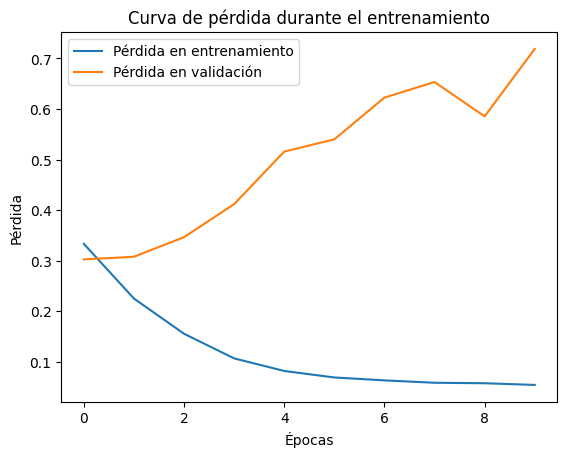

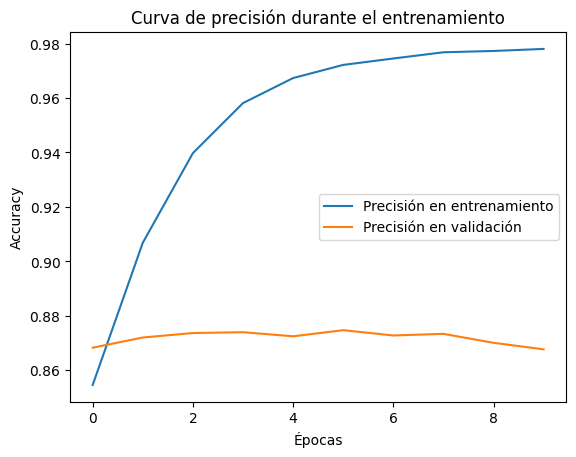

In [ ]:
plt.plot(history.history['loss'], label='P√©rdida en entrenamiento')
plt.plot(history.history['val_loss'], label='P√©rdida en validaci√≥n')
plt.title('Curva de p√©rdida durante el entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisi√≥n en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisi√≥n en validaci√≥n')
plt.title('Curva de precisi√≥n durante el entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


209/209 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 14ms/step


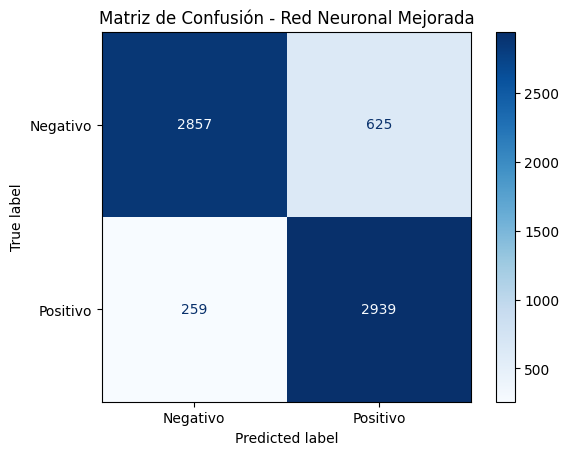

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_nn = (model.predict(X_test_nn) > 0.5).astype("int32")
cm = confusion_matrix(y_test_nn, y_pred_nn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negativo", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusi√≥n - Red Neuronal Mejorada")
plt.show()


209/209 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 21ms/step


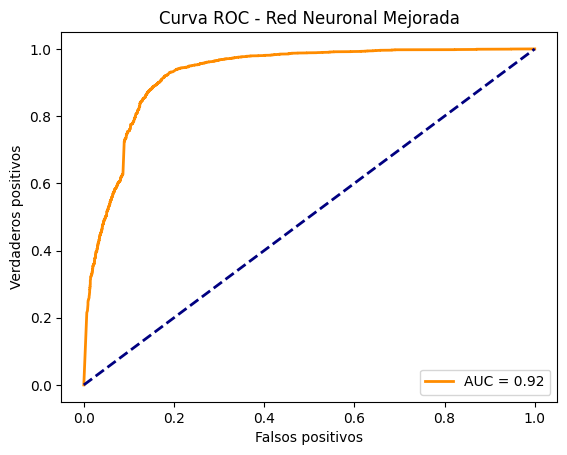

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict(X_test_nn).ravel()
fpr, tpr, _ = roc_curve(y_test_nn, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC - Red Neuronal Mejorada')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Evaluar el modelo sobre el conjunto de prueba
loss, accuracy = model.evaluate(X_test_nn, y_test_nn)

# Mostrar el resultado de accuracy
print(f"Test Accuracy: {accuracy:.2f}")


209/209 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 15ms/step - accuracy: 0.8622 - loss: 0.7427
Test Accuracy: 0.87


Aunque se implement√≥ una red neuronal m√°s profunda con m√∫ltiples capas ocultas, su precisi√≥n fue similar a la red simple anterior (alrededor del 87%). Esto indica que el problema ya estaba bien resuelto con una arquitectura sencilla, posiblemente por la claridad del lenguaje en las rese√±as y la eficacia del preprocesamiento y vectorizaci√≥n TF-IDF. En este caso, una red compleja no ofreci√≥ ventajas adicionales, lo cual es √∫til como aprendizaje para seleccionar modelos apropiados seg√∫n la complejidad del problema y los datos disponibles.